In [28]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
!pip install matplotlib

In [9]:
data = pd.read_csv("C:/Users/User/Downloads/rfm_data.csv")
print(data.head())

   CustomerID PurchaseDate  TransactionAmount ProductInformation  OrderID  \
0        8814   2023-04-11             943.31          Product C   890075   
1        2188   2023-04-11             463.70          Product A   176819   
2        4608   2023-04-11              80.28          Product A   340062   
3        2559   2023-04-11             221.29          Product A   239145   
4        9482   2023-04-11             739.56          Product A   194545   

   Location  
0     Tokyo  
1    London  
2  New York  
3    London  
4     Paris  


In [13]:
import pandas as pd

# Convert 'PurchaseDate' to datetime
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'])

# Calculate Recency
data['Recency'] = (pd.to_datetime('now').normalize() - data['PurchaseDate'].dt.normalize()).dt.days

# Calculate Frequency
frequency_data = data.groupby('CustomerID')['OrderID'].count().reset_index()
frequency_data.rename(columns={'OrderID': 'Frequency'}, inplace=True)
data = data.merge(frequency_data, on='CustomerID', how='left')

# Calculate Monetary Value
monetary_data = data.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
monetary_data.rename(columns={'TransactionAmount': 'MonetaryValue'}, inplace=True)
data = data.merge(monetary_data, on='CustomerID', how='left')

# Check for missing values
missing_values = data[['Recency', 'Frequency', 'MonetaryValue']].isnull().sum()
print("Missing values after merging:\n", missing_values)


Missing values after merging:
 Recency          0
Frequency        0
MonetaryValue    0
dtype: int64


In [14]:
data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,225,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,225,1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,225,1,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,225,1,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,225,1,739.56


In [15]:
# Define scoring criteria for each RFM value
recency_scores = [5, 4, 3, 2, 1]  # Higher score for lower recency (more recent)
frequency_scores = [1, 2, 3, 4, 5]  # Higher score for higher frequency
monetary_scores = [1, 2, 3, 4, 5]  # Higher score for higher monetary value

# Calculate RFM scores
data['RecencyScore'] = pd.cut(data['Recency'], bins=5, labels=recency_scores)
data['FrequencyScore'] = pd.cut(data['Frequency'], bins=5, labels=frequency_scores)
data['MonetaryScore'] = pd.cut(data['MonetaryValue'], bins=5, labels=monetary_scores)

In [16]:
# Convert RFM scores to numeric type
data['RecencyScore'] = data['RecencyScore'].astype(int)
data['FrequencyScore'] = data['FrequencyScore'].astype(int)
data['MonetaryScore'] = data['MonetaryScore'].astype(int)

In [17]:
# Calculate RFM score by combining the individual scores
data['RFM_Score'] = data['RecencyScore'] + data['FrequencyScore'] + data['MonetaryScore']

# Create RFM segments based on the RFM score
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
data['Value Segment'] = pd.qcut(data['RFM_Score'], q=3, labels=segment_labels)

In [18]:
data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,225,1,943.31,1,1,2,4,Low-Value
1,2188,2023-04-11,463.70,Product A,176819,London,225,1,463.70,1,1,1,3,Low-Value
2,4608,2023-04-11,80.28,Product A,340062,New York,225,1,80.28,1,1,1,3,Low-Value
3,2559,2023-04-11,221.29,Product A,239145,London,225,1,221.29,1,1,1,3,Low-Value
4,9482,2023-04-11,739.56,Product A,194545,Paris,225,1,739.56,1,1,2,4,Low-Value


C:\Users\User\AppData\Local\Temp\ipykernel_4144\3953044377.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




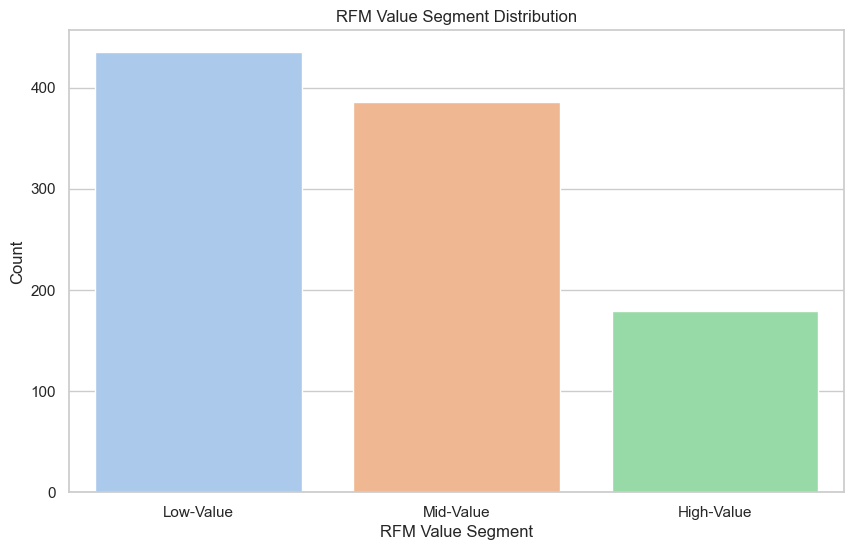

In [29]:



segment_counts = data['Value Segment'].value_counts().reset_index()
segment_counts.columns = ['Value Segment', 'Count']

# Set Seaborn style
sns.set(style="whitegrid")

# Create the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Value Segment', y='Count', data=segment_counts, palette='pastel')

# Set titles and labels
plt.title('RFM Value Segment Distribution')
plt.xlabel('RFM Value Segment')
plt.ylabel('Count')

# Show the plot
plt.show()


In [30]:
# Create a new column for RFM Customer Segments
data['RFM Customer Segments'] = ''

# Assign RFM segments based on the RFM score
data.loc[data['RFM_Score'] >= 9, 'RFM Customer Segments'] = 'Champions'
data.loc[(data['RFM_Score'] >= 6) & (data['RFM_Score'] < 9), 'RFM Customer Segments'] = 'Potential Loyalists'
data.loc[(data['RFM_Score'] >= 5) & (data['RFM_Score'] < 6), 'RFM Customer Segments'] = 'At Risk Customers'
data.loc[(data['RFM_Score'] >= 4) & (data['RFM_Score'] < 5), 'RFM Customer Segments'] = "Can't Lose"
data.loc[(data['RFM_Score'] >= 3) & (data['RFM_Score'] < 4), 'RFM Customer Segments'] = "Lost"

# Print the updated data with RFM segments
print(data[['CustomerID', 'RFM Customer Segments']])

     CustomerID RFM Customer Segments
0          8814            Can't Lose
1          2188                  Lost
2          4608                  Lost
3          2559                  Lost
4          9482            Can't Lose
..          ...                   ...
995        2970   Potential Loyalists
996        6669   Potential Loyalists
997        8836   Potential Loyalists
998        1440   Potential Loyalists
999        4759   Potential Loyalists

[1000 rows x 2 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_4144\544901777.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



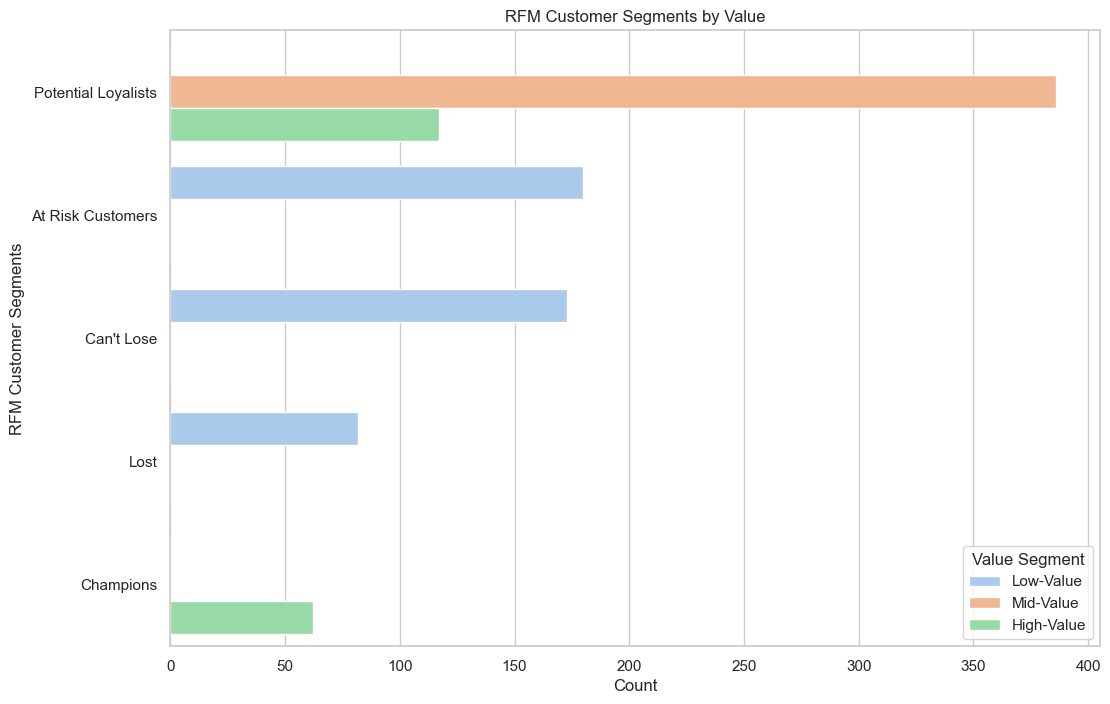

In [31]:

segment_product_counts = data.groupby(['Value Segment', 'RFM Customer Segments']).size().reset_index(name='Count')

# Sort the DataFrame by count in descending order
segment_product_counts = segment_product_counts.sort_values('Count', ascending=False)

# Set Seaborn style
sns.set(style="whitegrid")

# Create the treemap using Seaborn's barplot with hue
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='RFM Customer Segments', hue='Value Segment', data=segment_product_counts, palette='pastel', dodge=True)

# Set titles and labels
plt.title('RFM Customer Segments by Value')
plt.xlabel('Count')
plt.ylabel('RFM Customer Segments')

# Show the plot
plt.show()


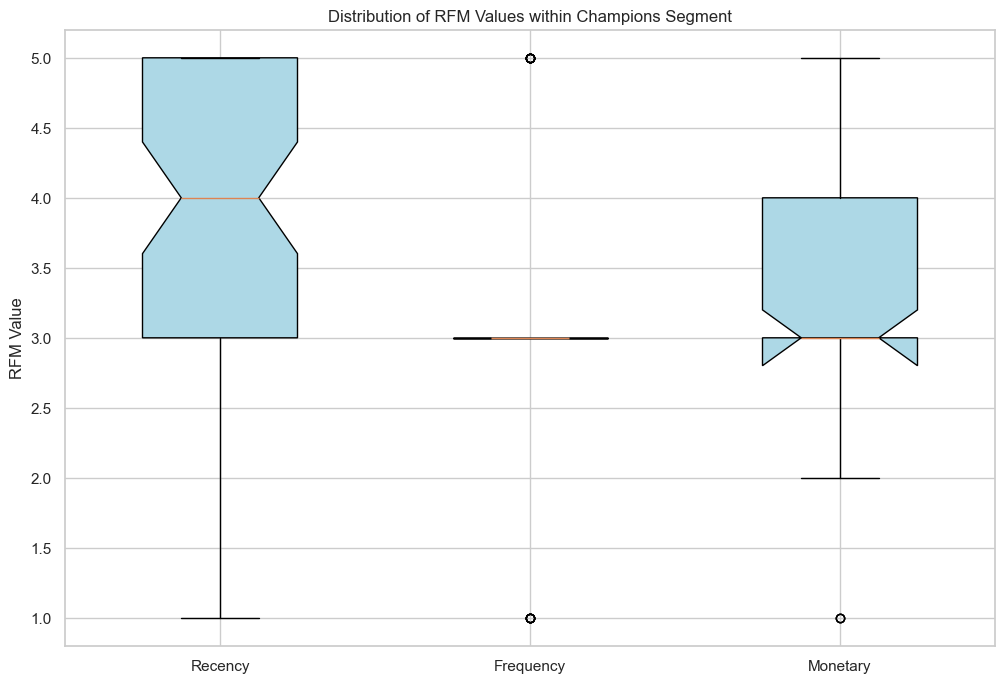

In [32]:

champions_segment = data[data['RFM Customer Segments'] == 'Champions']

# Create box plots using Matplotlib
plt.figure(figsize=(12, 8))

plt.boxplot([champions_segment['RecencyScore'], champions_segment['FrequencyScore'], champions_segment['MonetaryScore']],
            labels=['Recency', 'Frequency', 'Monetary'],
            notch=True, vert=True, patch_artist=True, widths=0.5, boxprops=dict(facecolor='lightblue', color='black'))

# Set titles and labels
plt.title('Distribution of RFM Values within Champions Segment')
plt.ylabel('RFM Value')

# Show the plot
plt.show()


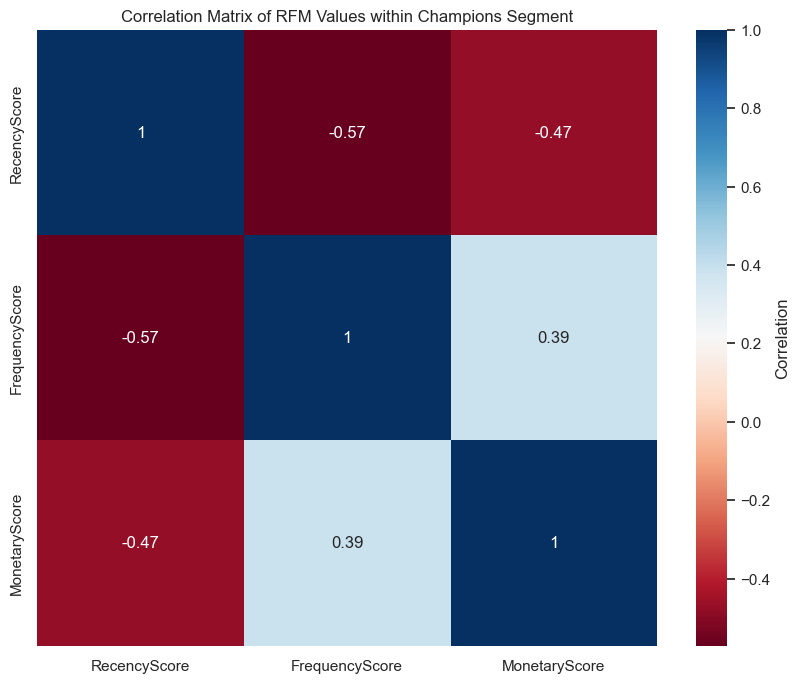

In [33]:

champions_segment = data[data['RFM Customer Segments'] == 'Champions']

# Calculate the correlation matrix
correlation_matrix = champions_segment[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', cbar_kws={'label': 'Correlation'})

# Set titles and labels
plt.title('Correlation Matrix of RFM Values within Champions Segment')

# Show the plot
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_4144\2723013073.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




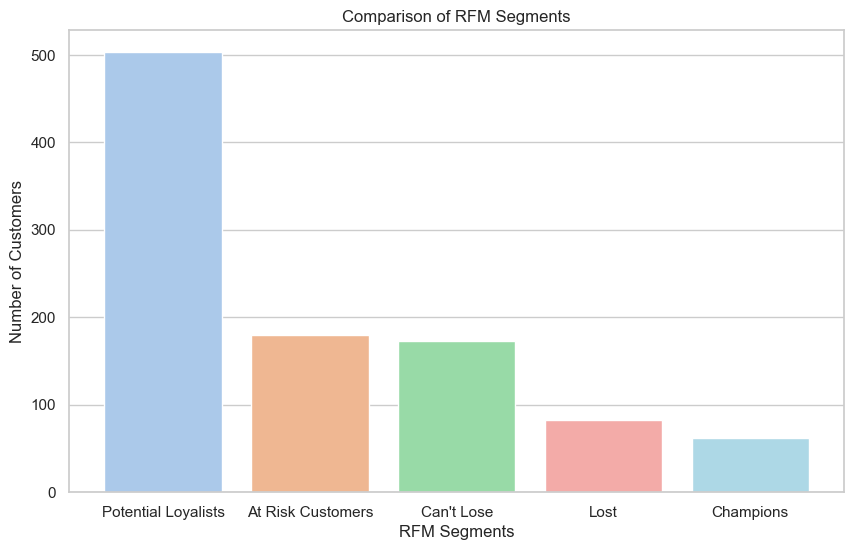

In [34]:

segment_counts = data['RFM Customer Segments'].value_counts()

# Set Seaborn style
sns.set(style="whitegrid")

# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='pastel')

# Highlight the 'Champions' segment with a different color
champions_color = 'lightblue'
champions_index = segment_counts.index.get_loc('Champions')
plt.bar(champions_index, segment_counts.values[champions_index], color=champions_color)

# Set titles and labels
plt.title('Comparison of RFM Segments')
plt.xlabel('RFM Segments')
plt.ylabel('Number of Customers')

# Show the plot
plt.show()


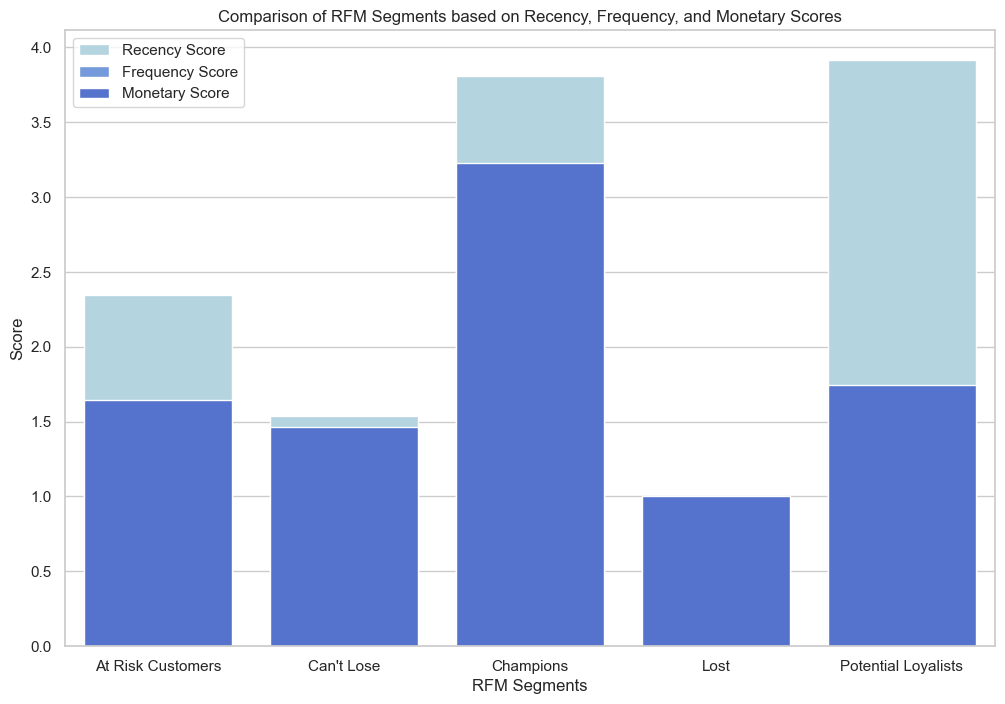

In [36]:

segment_scores = data.groupby('RFM Customer Segments')[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].mean().reset_index()

# Set Seaborn style
sns.set(style="whitegrid")

# Create a grouped bar chart using Seaborn
plt.figure(figsize=(12, 8))

# Plot Recency scores
sns.barplot(x='RFM Customer Segments', y='RecencyScore', data=segment_scores, color='lightblue', label='Recency Score')

# Plot Frequency scores
sns.barplot(x='RFM Customer Segments', y='FrequencyScore', data=segment_scores, color='cornflowerblue', label='Frequency Score')

# Plot Monetary scores
sns.barplot(x='RFM Customer Segments', y='MonetaryScore', data=segment_scores, color='royalblue', label='Monetary Score')

# Set titles and labels
plt.title('Comparison of RFM Segments based on Recency, Frequency, and Monetary Scores')
plt.xlabel('RFM Segments')
plt.ylabel('Score')

# Show the plot
plt.legend()
plt.show()


In [37]:
segment_scores = data.groupby('RFM Customer Segments')[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].mean().reset_index()
